# Naive Bayes

In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
# Load the dataset
data = load_breast_cancer()
# Create a DataFrame with features
features_df = pd.DataFrame(data.data, columns=data.feature_names)
# Add the target variable to the DataFrame
features_df['target'] = data.target
# Display the first few rows of the DataFrame
features_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
# Check for missing values
print(features_df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [6]:
# Check Balance of data
print(features_df['target'].value_counts(normalize=True))

1    0.627417
0    0.372583
Name: target, dtype: float64


In [7]:
# Import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns

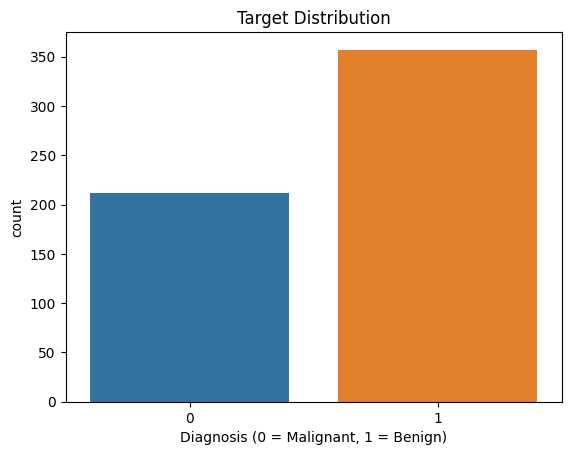

In [8]:
# Visualize the distribution of the target variable
sns.countplot(x='target', data=features_df)
plt.title('Target Distribution')
plt.xlabel('Diagnosis (0 = Malignant, 1 = Benign)')
plt.show()

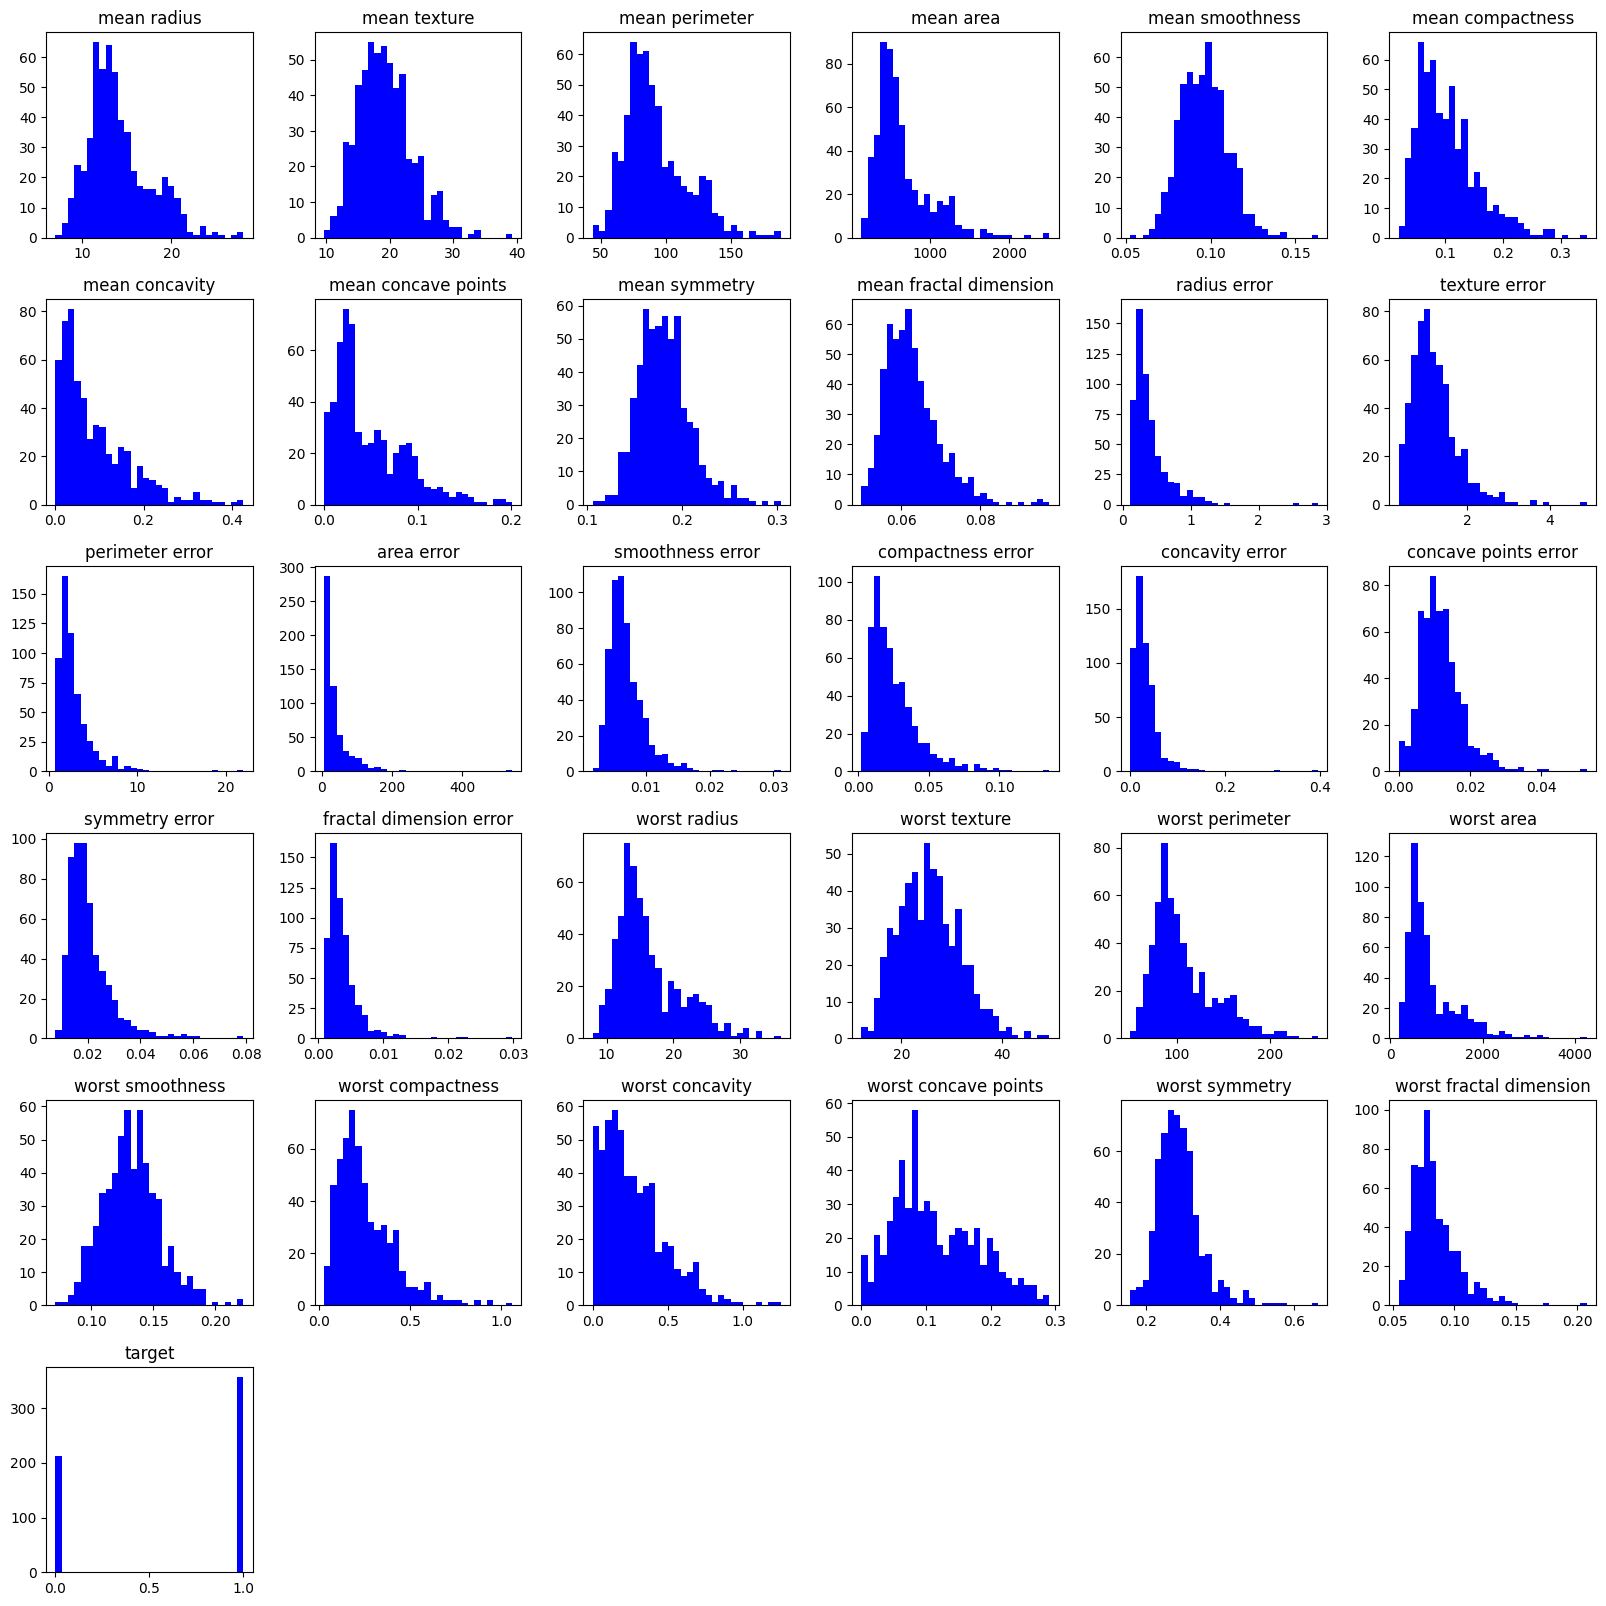

In [9]:
# Visualize the distribution of the features
features_df.hist(bins=30, figsize=(20, 20), color='b', grid=False)
plt.show()

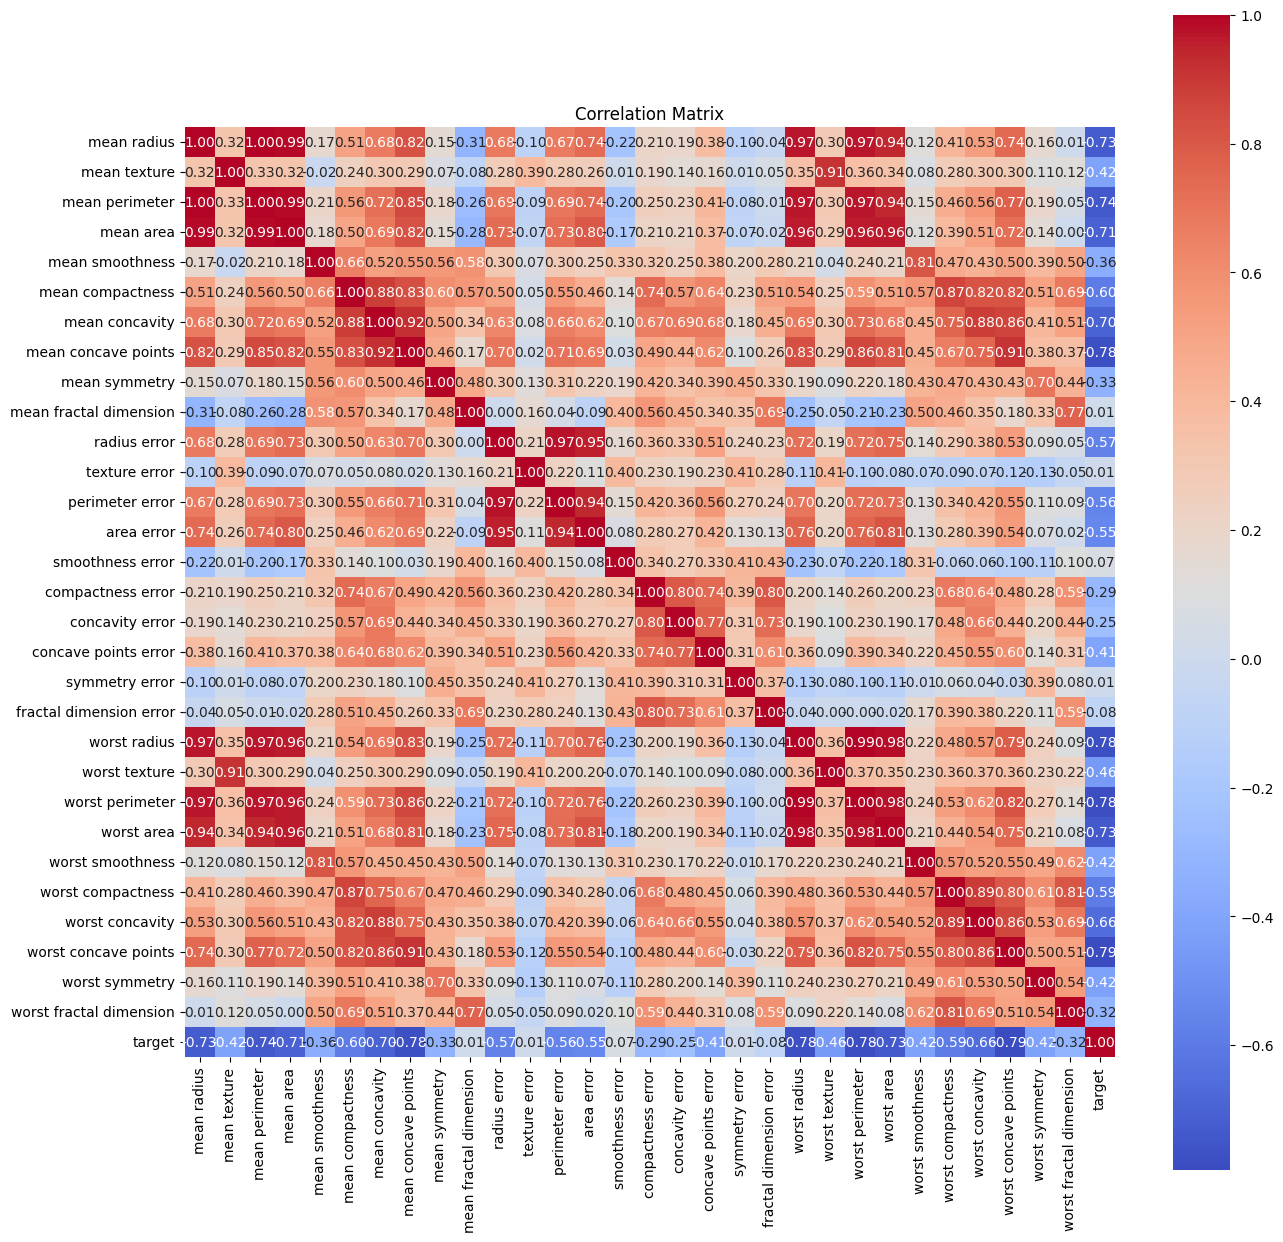

In [14]:
# Correlation matrix heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(features_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

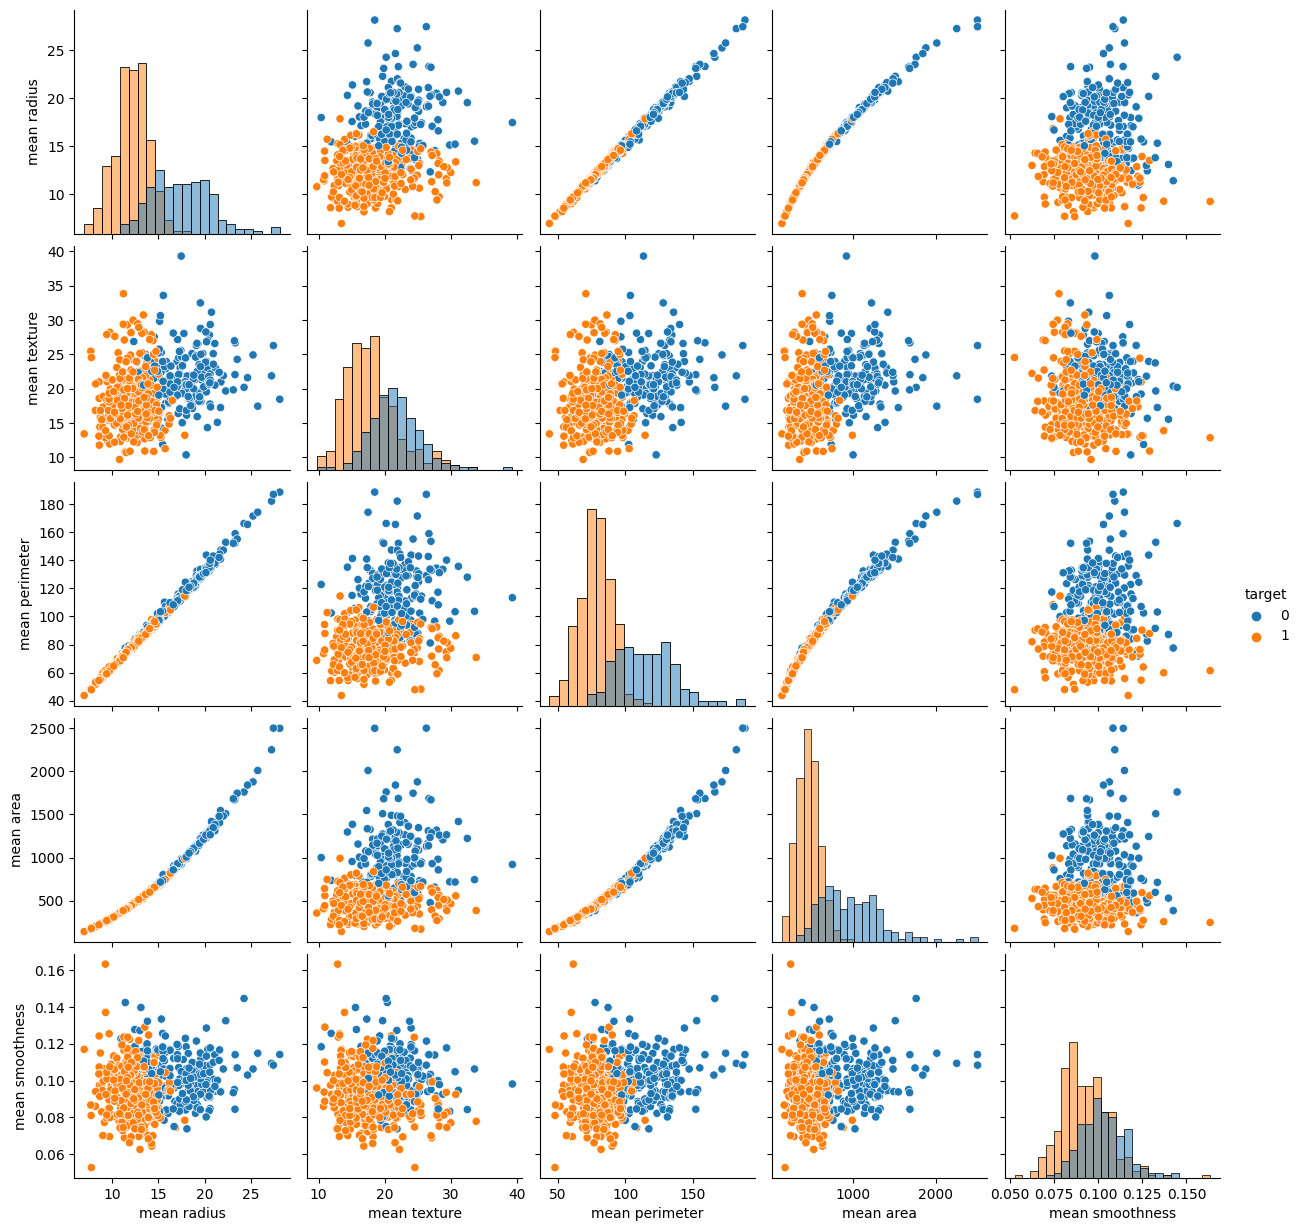

In [16]:
# Pairplot (use only a few selected features to avoid clutter)
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness']
sns.pairplot(features_df, vars=selected_features, hue='target', diag_kind='hist')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Split the data into training and testing sets
X = features_df.drop('target', axis=1)
y = features_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Define the parameter grid for var_smoothing
param_grid = {'var_smoothing': np.logspace(-10, -1, 10)}
# Create a Gaussian Naive Bayes classifier instance
gnb = GaussianNB()
# Create the GridSearchCV instance with the classifier and parameter grid
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy')
# Fit the GridSearchCV instance on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01])},
             scoring='accuracy')

In [20]:
# Get the best parameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best parameters found: ", best_params)
print("Best accuracy found: {:.2f}%".format(best_accuracy * 100))

Best parameters found:  {'var_smoothing': 1e-09}
Best accuracy found: 93.41%


In [21]:
# Make predictions on the test set using the best parameters
best_gnb = grid_search.best_estimator_
y_pred = best_gnb.predict(X_test)

In [22]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy (with best parameters): {:.2f}%".format(accuracy * 100))


Accuracy (with best parameters): 97.37%


In [23]:
# Print the classification report
print("\nClassification Report (with best parameters):")
print(classification_report(y_test, y_pred))


Classification Report (with best parameters):
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



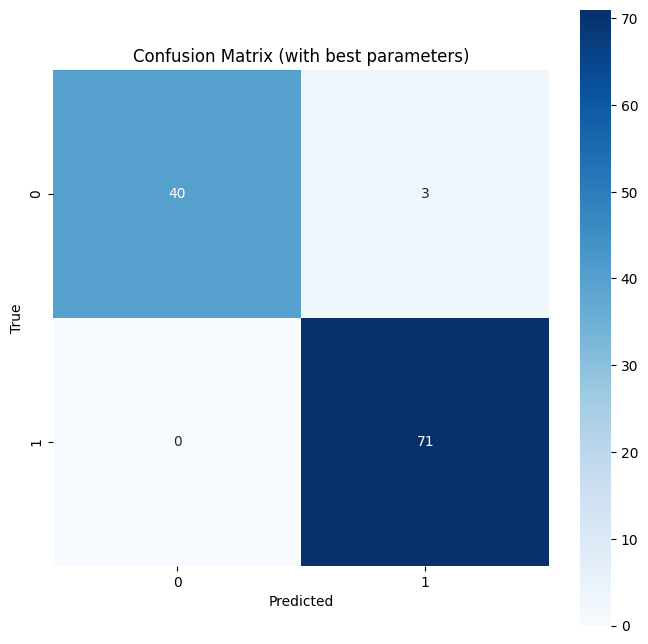

In [24]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix (with best parameters)")
plt.show()